## 1. Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = 'dark')
import matplotlib.pyplot as plt
import random 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
print("All the required packages has been installed")

All the required packages has been installed


## 2. Reading the necessary files 

In [2]:
data=pd.read_csv(r"E:\ML\Webtek\DATASET\fifa.csv")
print("The necessary file has been read.")

The necessary file has been read.


# 3. Analysing the dataset

## 3.1. Displaying the first 10 tuples

In [3]:
data.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


## 3.2.Exploring the columns of the dataset

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## 3.3 Checking the present dimension of the data set

In [3]:
rows,cols=data.shape
print("No. of Rows in the data: ",rows)
print("No. of Columns in the data: ",cols)

No. of Rows in the data:  18207
No. of Columns in the data:  89


## 3.4 Checking number of null values present in each column of the dataset

In [6]:
data.isnull().sum().any()
print("Data contains NULL values:",data.isnull().sum().any())

Data contains NULL values: True


##  3.5. Checking for duplicated values

In [6]:
data.duplicated().sum()
print("Number of DUPLICATED values in the Data:",data.duplicated().sum())

Number of DUPLICATED values in the Data: 0


# 4. Data Visualisation and  Preprocessing

### On proper analysing the data set it is found that some rows contains more than 70% of null entries so such rows are removed

In [8]:
data.drop(data[data["Position"].isnull()].index,axis=0,inplace=True)
print("Such rows are deleted using drop")

Such rows are deleted using drop


## 4.1 Plotting age and its frequency

Text(0.5, 1.0, 'Histogram og age of players')

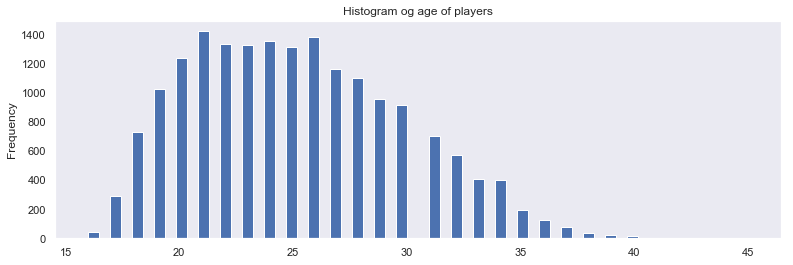

In [9]:
plt.figure(1, figsize=(13, 4))
data['Age'].plot(kind = 'hist', bins = 60)
plt.title('Histogram og age of players')

## 4.2 Counterplot for position of players

Text(0.5, 1.0, 'Counterplot for position of players')

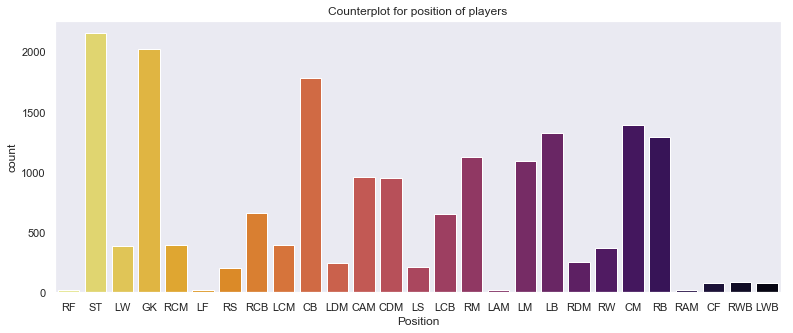

In [10]:
plt.figure(1, figsize=(13, 5))
sns.countplot(x = 'Position', data = data, palette='inferno_r')
plt.title('Counterplot for position of players')

## 4.3 Comparision b/w left and right footer players

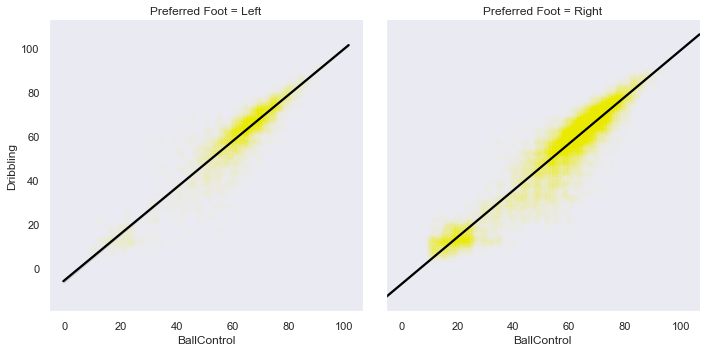

In [11]:
sns.lmplot(data = data, x = 'BallControl', y = 'Dribbling', col = 'Preferred Foot', scatter_kws = {'alpha':0.01, 'color':'yellow'}, line_kws = {'color': 'black'})

## 4.4 Plotting nationality v/s frequency of players in that nation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

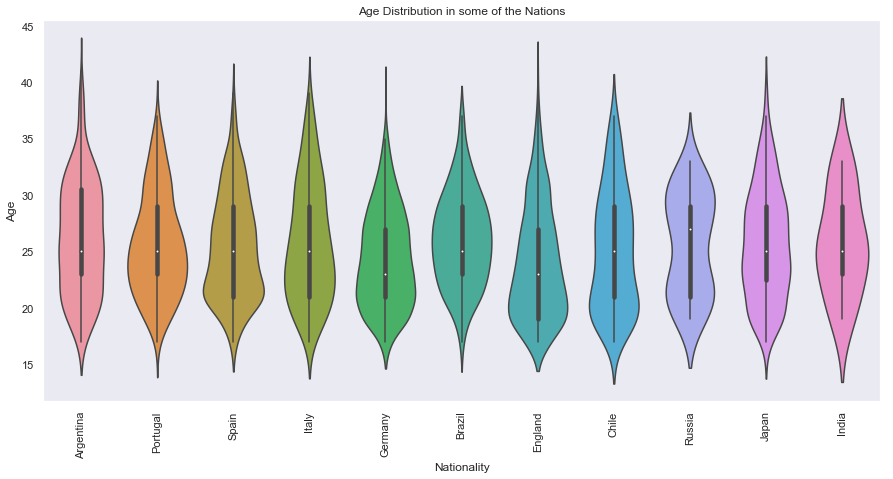

In [12]:
vals = ['England', 'Brazil', 'Portugal', 'Argentina', 'Italy', 'Spain', 'Germany', 'Russia', 'Chile', 'Japan', 'India']
data_club_age  = data.loc[data['Nationality'].isin(vals) & data['Age']]
plt.figure(1, figsize=(15, 7))
sns.violinplot(data = data_club_age, x = 'Nationality', y = 'Age')
plt.title('Age Distribution in some of the Nations')
plt.xticks(rotation = 90)

## 4.5 Dropping unneccesary and unwanted columns from the data set

In [13]:
data.drop(['Unnamed: 0', 'ID', 'Name', 'Photo', 'Nationality', 'Flag','Club', 'Club Logo','Wage','Preferred Foot','Weak Foot','Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until','Release Clause'],axis=1,inplace=True)
print("Columns such as 'Unnamed: 0', 'ID', 'Name', 'Photo', 'Nationality', 'Flag','Club', 'Club Logo','Wage','Preferred Foot','Weak Foot','Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until','Release Clause' are deleted.")

Columns such as 'Unnamed: 0', 'ID', 'Name', 'Photo', 'Nationality', 'Flag','Club', 'Club Logo','Wage','Preferred Foot','Weak Foot','Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until','Release Clause' are deleted.


## 4.6 Visualizing age vs sprintspeed

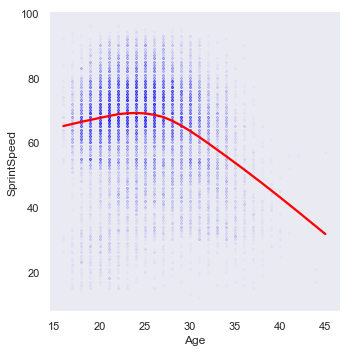

In [14]:
sns.lmplot(data = data, x = 'Age', y = 'SprintSpeed', lowess = True, scatter_kws = {'alpha':0.01, 's':5, 'color':'blue'}, line_kws = {'color': 'red'})

#### The above graph shows us that as the age increases the sprintspeed decreases

## 4.7 Checking for null values

In [15]:
data.isnull().sum().any()
print("Data contains NULL values:",data.isnull().sum().any())

Data contains NULL values: True


### 4.7.1 The above columns that have the null values have numeric values stored in string,before imputing we should process such rows

In [16]:
data.iloc[:10,12:38]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
5,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3
6,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,...,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3
7,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,...,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5
8,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,...,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.7.1.1 The columns such as LS,ST and so on contains strings as 90+2 so for converting these strings to float a function string_to_number is defined below


In [17]:
def string_to_number(x):
    if(type(x)==str):
        x1=x[:2]
        x2=x[-1]
        p=int(x1)+int(x2)
        return p
    else:
        return x
print("The function string_to_number is defined to convert String type number to Integer type number")    

The function string_to_number is defined to convert String type number to Integer type number


#### 4.7.1.2  Applying the function to all the required columns

In [18]:
for i in range(12,38):
    data.iloc[:,i]=data.iloc[:,i].apply(string_to_number)
print("string_to_number function is applied to all columns between index 12 to 38 sucessfully")

string_to_number function is applied to all columns between index 12 to 38 sucessfully


#### 4.7.1.3 Displaying the processed columns

In [19]:
data.iloc[:15,12:38]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,...,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
5,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,...,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0
6,80.0,80.0,80.0,88.0,87.0,87.0,87.0,88.0,90.0,90.0,...,85.0,84.0,84.0,84.0,85.0,82.0,74.0,74.0,74.0,82.0
7,92.0,92.0,92.0,91.0,92.0,92.0,92.0,91.0,90.0,90.0,...,74.0,73.0,73.0,73.0,74.0,71.0,68.0,68.0,68.0,71.0
8,76.0,76.0,76.0,73.0,74.0,74.0,74.0,73.0,74.0,74.0,...,84.0,87.0,87.0,87.0,84.0,87.0,90.0,90.0,90.0,87.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.7.2 Plotting graphs on basis of "Skill Moves" for each rows having null values

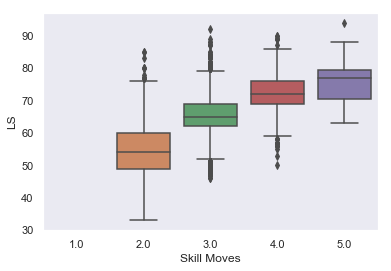

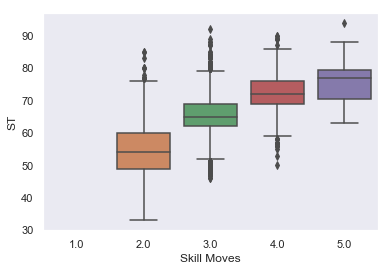

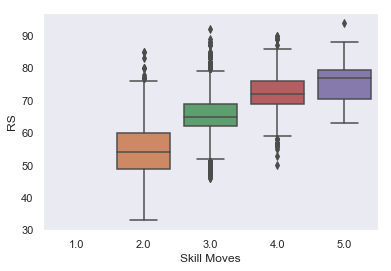

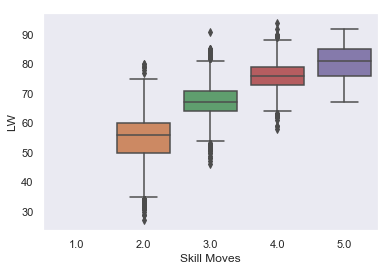

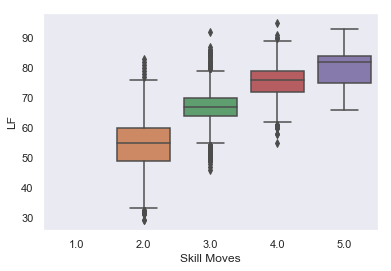

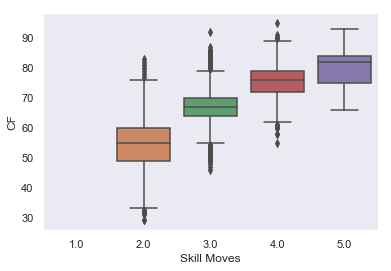

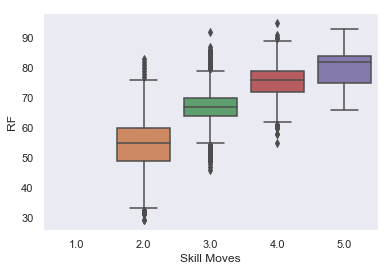

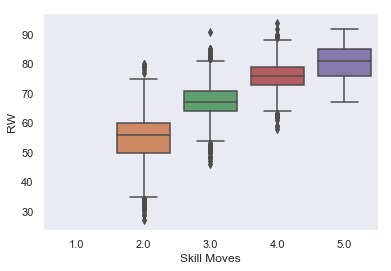

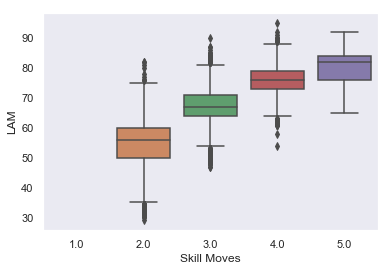

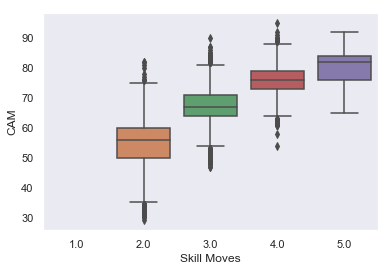

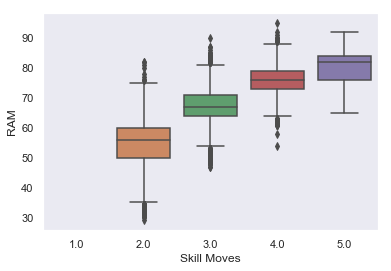

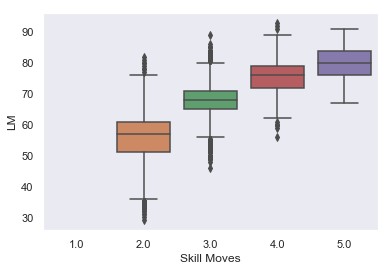

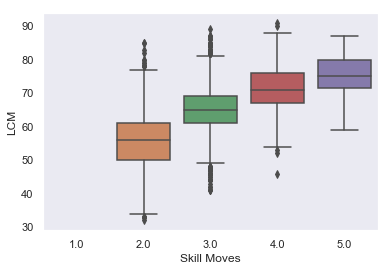

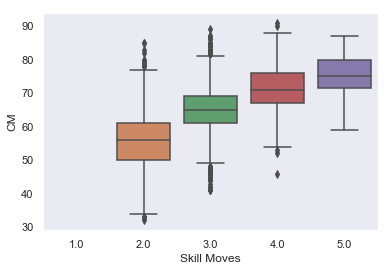

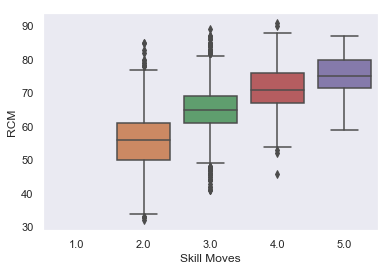

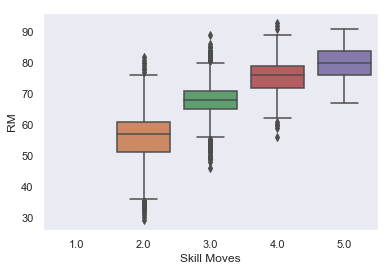

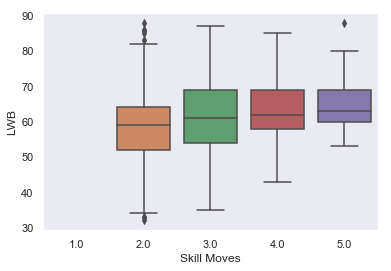

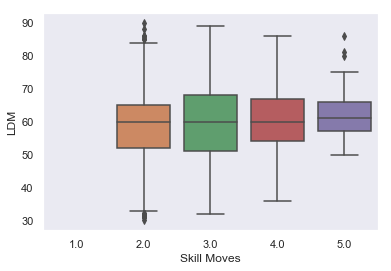

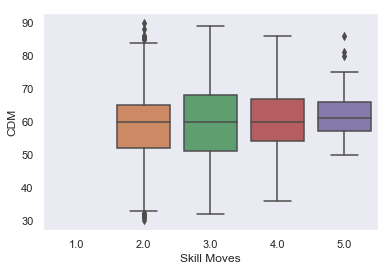

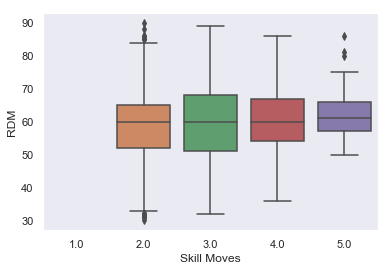

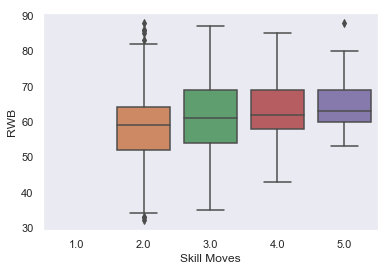

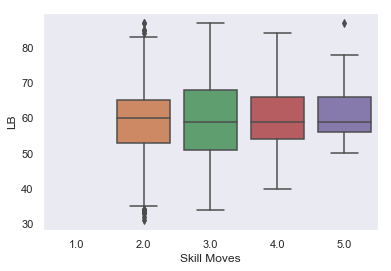

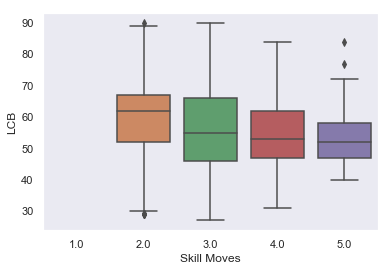

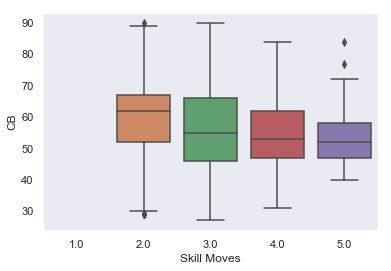

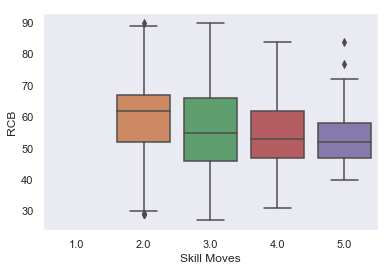

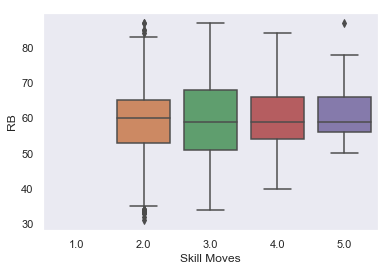

In [20]:
col=data.iloc[:,12:38].columns
for i in col:
    plt.subplot(1,1,1)
    sns.boxplot(x='Skill Moves',y=i,data=data)
    plt.show()
    

#### From the boxplot it is evident that NaN values occurs only for those players whose "Skill Values" is 1. Also analysing the data set it is evident that players with Position as Goalkeeper have skill value equal to 1

### 4.7.2.1 Function to impute NAN values

In [21]:
random.seed(5)
def imputeNan(cols):
    column=cols[0]
    Skill_Moves=cols[1]
    if pd.isnull(column):
        return random.randrange(5,15)
    else:
        return column
print("The function impute NaN is defined to impute NaN values based on Skill Moves")    

The function imputeNan is defined to impute NaN values based on Skill Moves


### 4.7.2.2 Appling the function to impute NAN values

In [22]:
for i in col:
    data[i]=data[[i,'Skill Moves']].apply(imputeNan,axis=1)
print("imputeNan function is applied to Value column sucessfully")    

imputeNan function is applied to Value column sucessfully


### 4.7.2.3 Displaying the processed columns

In [23]:
data.iloc[:10,12:38]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
3,14.0,7.0,8.0,5.0,10.0,7.0,6.0,12.0,6.0,7.0,...,8.0,8.0,6.0,11.0,10.0,12.0,6.0,13.0,7.0,11.0
4,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,...,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
5,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,...,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0
6,80.0,80.0,80.0,88.0,87.0,87.0,87.0,88.0,90.0,90.0,...,85.0,84.0,84.0,84.0,85.0,82.0,74.0,74.0,74.0,82.0
7,92.0,92.0,92.0,91.0,92.0,92.0,92.0,91.0,90.0,90.0,...,74.0,73.0,73.0,73.0,74.0,71.0,68.0,68.0,68.0,71.0
8,76.0,76.0,76.0,73.0,74.0,74.0,74.0,73.0,74.0,74.0,...,84.0,87.0,87.0,87.0,84.0,87.0,90.0,90.0,90.0,87.0
9,9.0,9.0,11.0,13.0,10.0,5.0,14.0,10.0,14.0,7.0,...,5.0,11.0,14.0,12.0,14.0,6.0,11.0,9.0,10.0,8.0


### Finally,all the preprocessing for null values have been done

# 4.8 Processing Categorial values

### 4.8.1.1  Value of players are given in euros as string, "torupees" converts the euros to rupees

In [24]:
def torupees(x):
    y=x[0]
    st=y[1:]
    if(st[-1]=='M'):
        return float(st[:-1])*1000000
    elif(st[-1]=='K'):
        return float(st[:-1])*1000
    else:
        return float(st)
print("The function torupees is defined to convert Euros to Rupees")    

The function torupees is defined to convert Euros to Rupees


### 4.8.1.2 Applying "torupees" function to Value column

In [25]:
data['Value']=data[['Value']].apply(torupees,axis=1)
print("torupees function is applied to Value column sucessfully")

torupees function is applied to Value column sucessfully


### 4.8.1.3 Displaying the changed Value

In [26]:
data.iloc[:5,[3]]

,Value
0,110500000.0
1,77000000.0
2,118500000.0
3,72000000.0
4,102000000.0


## 4.8.2 Comparision b/w age and potential

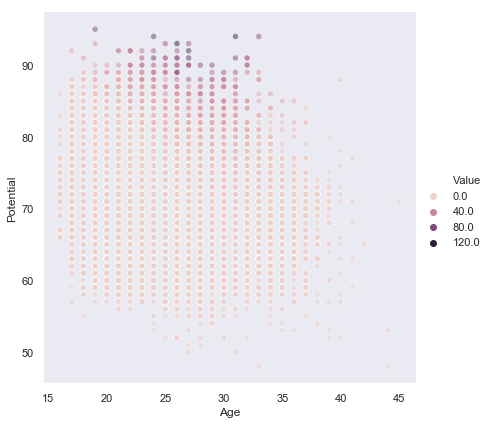

In [27]:
value = data.Value
cmap = sns.cubehelix_palette(rot  = -.2, as_cmap = True)
sns.relplot(data = data, x = 'Age', y = 'Potential', hue = value/1000000, sizes = (40, 400), alpha = .5, height = 6)


### 4.8.3.1 Checking the unique values present in Column Body Type

In [28]:
data['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

### 4.8.3.2 Changing the values to a proper type

In [29]:
data['Body Type'][data['Body Type']=='Messi']='Lean'
data['Body Type'][data['Body Type']=='C. Ronaldo']='Normal'
data['Body Type'][data['Body Type']=='Neymar']='Lean'
data['Body Type'][data['Body Type']=='Courtois']='Lean'
data['Body Type'][data['Body Type']=='PLAYER_BODY_TYPE_25']='Normal'
data['Body Type'][data['Body Type']=='Shaqiri']='Stocky'
data['Body Type'][data['Body Type']=='Akinfenwa']='Stocky'
print("All the body types are convereted in three groups")

All the body types are convereted in three groups


### 4.8.3.3 Displaying the body types

In [30]:
print("The body types:",data['Body Type'].unique())

The body types: ['Lean' 'Normal' 'Stocky']


### 4.8.4 The column Height contains values in inches and feet,heightcoversion is used for converting the height in inch

### 4.8.4.1 Displaying the sample height.

In [31]:
print("The samples of the height")
data['Height'][:20]

The samples of the height


0      5'7
1      6'2
2      5'9
3      6'4
4     5'11
5      5'8
6      5'8
7      6'0
8      6'0
9      6'2
10     6'0
11     6'0
12     6'2
13     5'8
14     5'6
15    5'10
16     6'2
17     5'9
18     6'2
19     6'6
Name: Height, dtype: object

### 4.8.4.2 Defining a function to convert height in inches only

In [32]:
def heightconversion(p):
    col=p[0]
    a=col.split("'")
    c=int(a[0])*12+int(a[1])
    return c
print("The 'heightconversion' function is defined")

The 'heightconversion' function is defined


### 4.8.4.3 Applying "heightconversion" function to the Height column

In [33]:
data['Height']=data[['Height']].apply(heightconversion,axis=1)

In [36]:
data['Height'][:5]

0    67
1    74
2    69
3    76
4    71
Name: Height, dtype: int64

## 4.8.5 Weight column contains "lbs" as unit which needs to be removed,weight function is defined for this. 

In [37]:
data['Weight'][:5]

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

### 4.8.5.1 Defining a function to convert weight in floating point.

In [38]:
def weight(x):
    p=x[0]
    a=p.split('lbs')
    return float(a[0])

### 4.8.5.2 Applying "weight" function to the Weight column

In [39]:
data['Weight']=data[['Weight']].apply(weight,axis=1)

In [40]:
data['Weight'][:5]

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

## 4.8.6 Columns such as Position,Work Rate and Body Type contains categorial values which needs to be removed using LabelEncoder.

In [41]:
le=LabelEncoder()
data['Position']=le.fit_transform(data['Position'])
data['Work Rate']=le.fit_transform(data['Work Rate'])
data['Body Type']=le.fit_transform(data['Body Type'])
print("LAbelEncoder used and the changed values sample is printed.")
print(data.loc[:5,['Position','Work Rate','Body Type']])

LAbelEncoder used and the changed values sample is printed.
   Position  Work Rate  Body Type
0        21          8          0
1        26          1          1
2        14          2          0
3         5          8          0
4        19          0          1
5        11          2          1


In [42]:
print("Shape of the dataset")

Shape of the dataset


In [43]:
data.shape

(18147, 72)

## 4.9 Checking for Linear Features and Normalised features using Pairplot

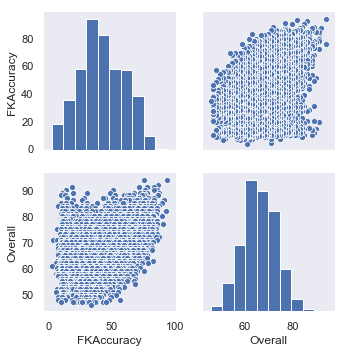

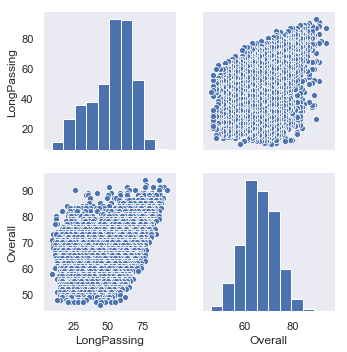

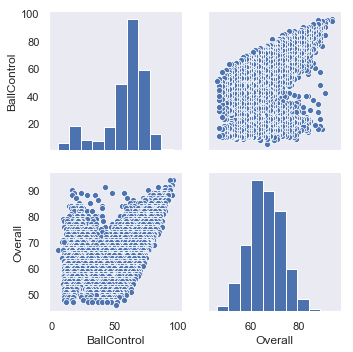

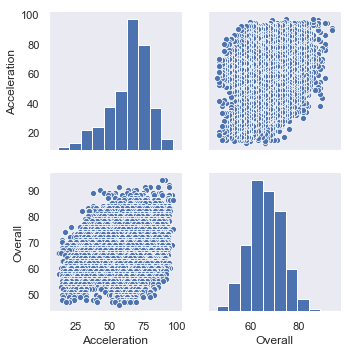

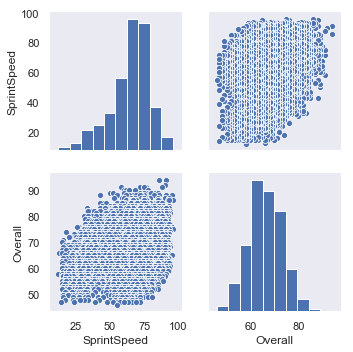

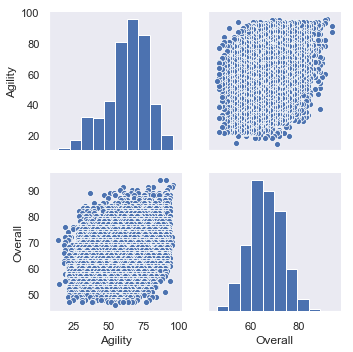

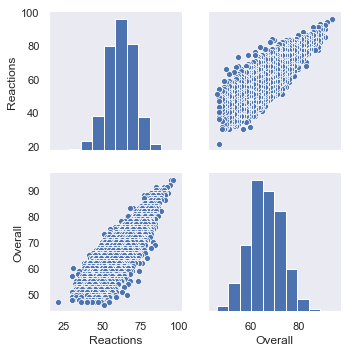

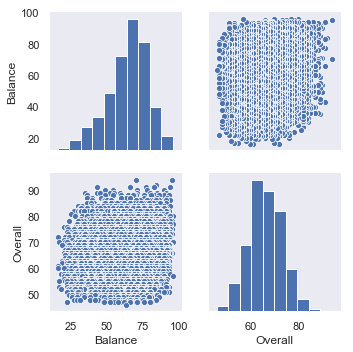

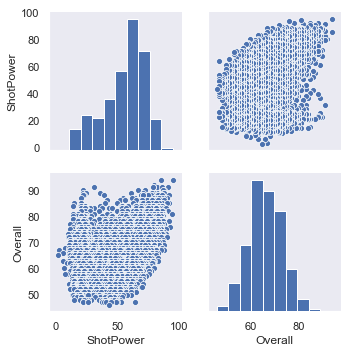

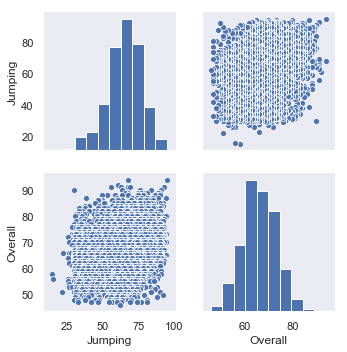

In [44]:
for i in range(45,55):
    if i!=1:
        sns.pairplot(data.iloc[:,[i,1]])
        

## 4.9.1 PairPlot shows that most of the features doesnot have a linear relation with the dependent target.

In [45]:
print("Dropping all the Non-Linear Features")
data.drop(['Height', 'Weight','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Balance', 'Aggression',
       'Interceptions', 'Positioning','Marking', 'StandingTackle', 'SlidingTackle'],axis=1,inplace=True)

Dropping all the Non-Linear Features


## 4.9.2 Columns such as 'Work Rate', 'Body Type','Position' are not normalised and lof transformation also doesnot help.

In [46]:
#data['Work Rate']=data['Work Rate'].map(np.log1)
#data['Body Type']=data['Body Type'].map(np.log)
#data['Position']=data['Position'].map(np.log)
print("Normalising Work Rate,Body Type,Position columns does not help as data doesnot get normalised so they are not normalised")

Normalising Work Rate,Body Type,Position columns does not help as data doesnot get normalised so they are not normalised


## The data contains the column that is to be predicted.This column is stored in "y" and dropped from "data" so that Pearson Correlation Coefficient can be found.

In [47]:
print("Storing the target or dependent variable")
y= data.iloc[:,[1]]
data.drop('Overall',axis=1,inplace=True)

Storing the target or dependent variable


## 4.10 Visualising the Correlation Matrix using HeatMap

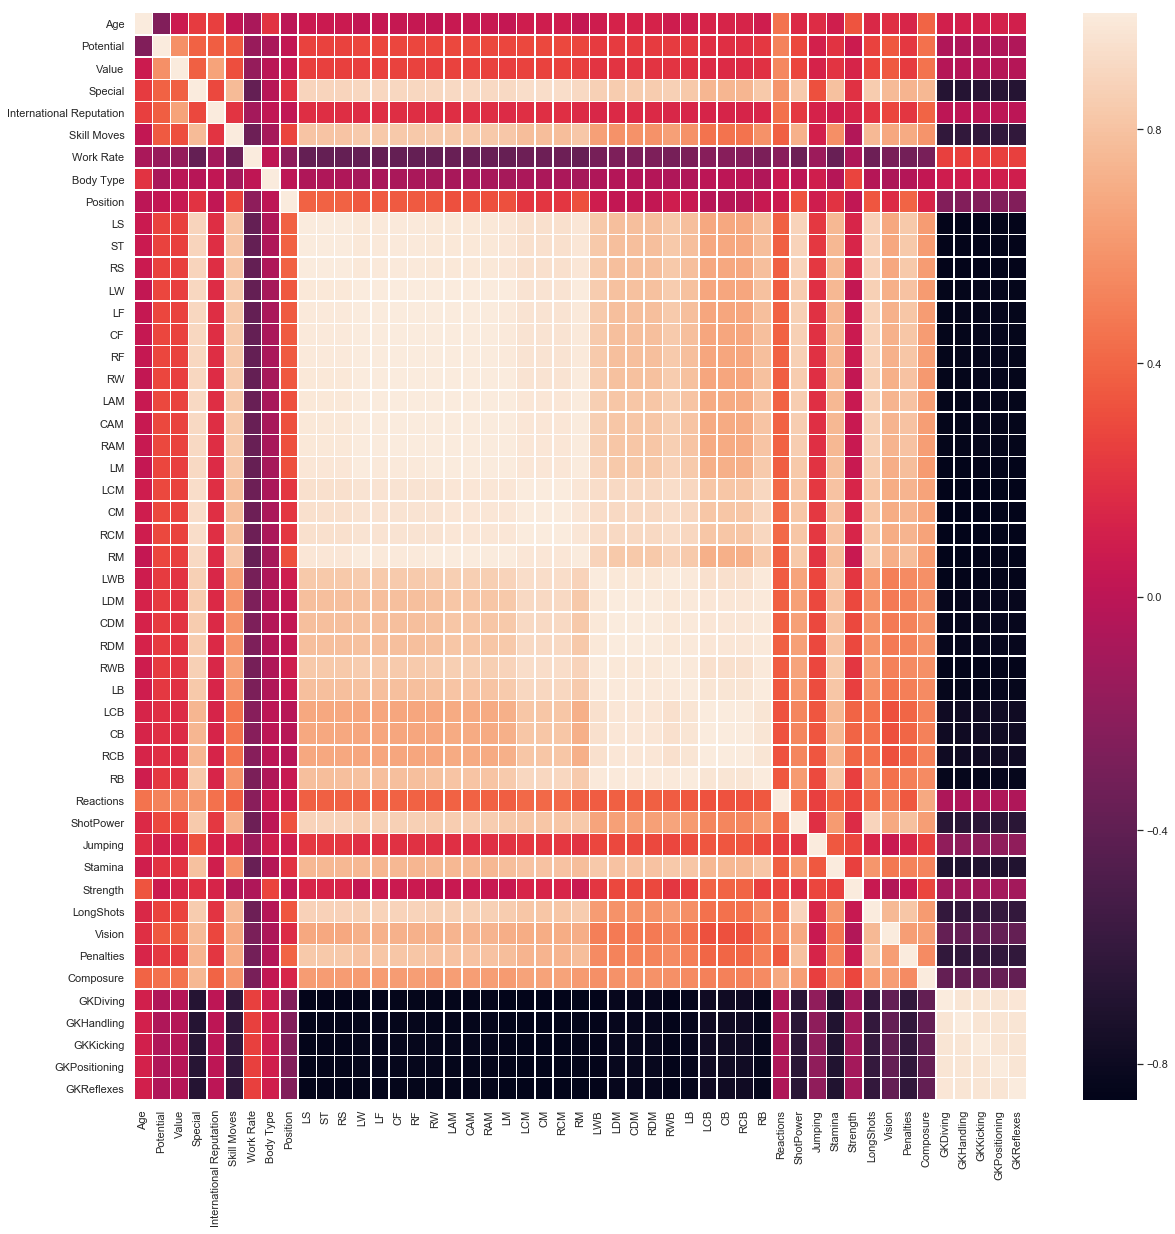

In [48]:
fig, size = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),linewidths=.5,ax=size)

### 4.10.1 Checking for correlation coefficient for different columns for which value is greater or equal to 0.9 using function

In [49]:
#corr=data.corr().values
#rows,cols=data.shape
#columnnames=list(data.columns)
#for i in range(cols):
    #for j in range(i+1,cols):
        #if corr[i,j]>abs(0.9) or corr[i,j]==abs(0.9):
            #print(columnnames[i], ' ', columnnames[j],' ', corr[i,j])
print("Columns having coefficient greater than 0.9 needs to be deleted")

Columns having coefficient greater than 0.9 needs to be deleted


### 4.10.2 Columns showing high correlation coefficient are dropped to avoid Collinearity.

In [50]:
print("Dropping correalted features like 'ST', 'LS','RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM','LM', 'LCM', 'CM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB','RCB','RCM', 'GKDiving', 'GKHandling', 'GKKicking','GKPositioning','GKReflexes'")
data.drop(['ST', 'LS','RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM','LM', 'LCM', 'CM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB','RCB','RCM', 'GKDiving', 'GKHandling', 'GKKicking','GKPositioning','GKReflexes'],axis=1,inplace=True)

Dropping correalted features like 'ST', 'LS','RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM','LM', 'LCM', 'CM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB','RCB','RCM', 'GKDiving', 'GKHandling', 'GKKicking','GKPositioning','GKReflexes'


## 4.10.2 Using heatmap checking again if collinearity is removed or note

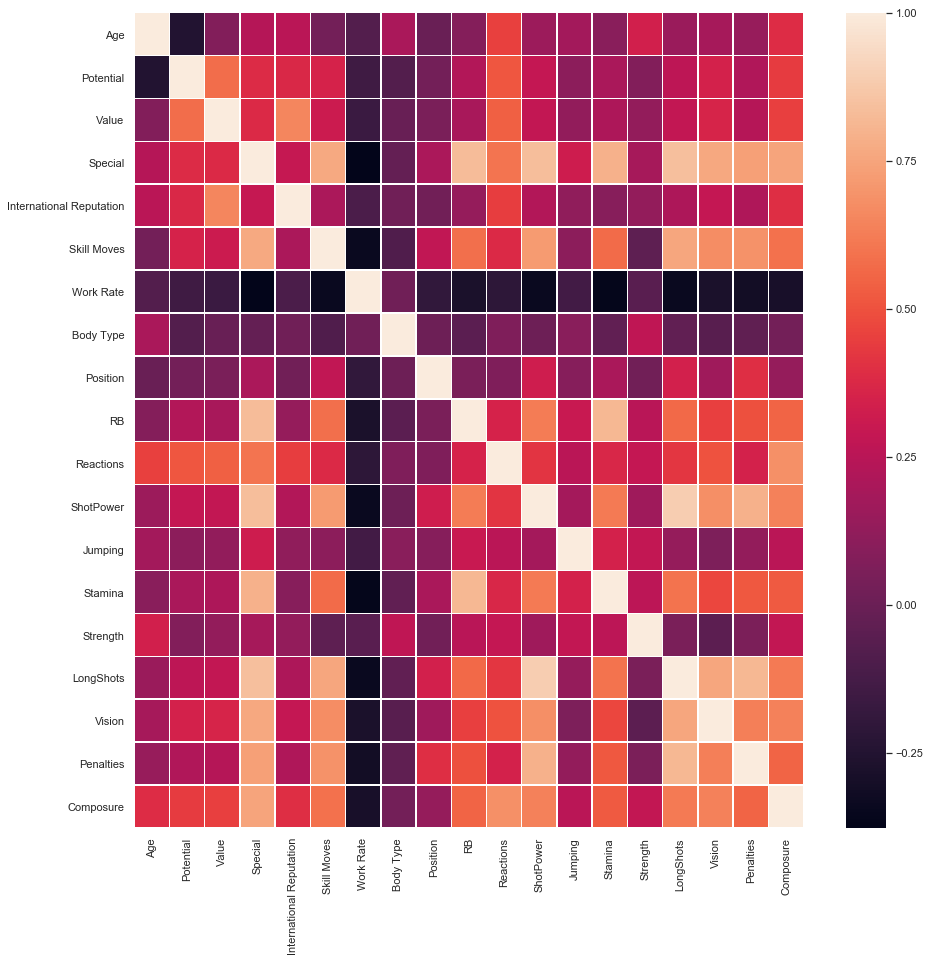

In [51]:
fig, size = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),linewidths=.5,ax=size)

#### No collinearity is left because only diagonals are light in color which has to be because each column will always be collinear to itself

In [52]:
print("Displaying Sample of processed data") 
data.iloc[:5,:]

Displaying Sample of processed data


,Age,Potential,Value,Special,International Reputation,Skill Moves,Work Rate,Body Type,Position,RB,Reactions,ShotPower,Jumping,Stamina,Strength,LongShots,Vision,Penalties,Composure
0,31,94,110500000.0,2202,5.0,4.0,8,0,21,61.0,95.0,85.0,68.0,72.0,59.0,94.0,94.0,75.0,96.0
1,33,94,77000000.0,2228,5.0,5.0,1,1,26,64.0,96.0,95.0,95.0,88.0,79.0,93.0,82.0,85.0,95.0
2,26,93,118500000.0,2143,5.0,5.0,2,0,14,63.0,94.0,80.0,61.0,81.0,49.0,82.0,87.0,81.0,94.0
3,27,93,72000000.0,1471,4.0,1.0,8,0,5,11.0,90.0,31.0,67.0,43.0,64.0,12.0,68.0,40.0,68.0
4,27,92,102000000.0,2281,4.0,4.0,0,1,19,76.0,91.0,91.0,63.0,90.0,75.0,91.0,94.0,79.0,88.0


In [53]:
print("Columns present in the data set finally")
data.columns

Columns present in the data set finally


Index(['Age', 'Potential', 'Value', 'Special', 'International Reputation',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'RB', 'Reactions',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Vision',
       'Penalties', 'Composure'],
      dtype='object')

## 5. Columns on which the target variable depends.

In [54]:
data.columns

Index(['Age', 'Potential', 'Value', 'Special', 'International Reputation',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'RB', 'Reactions',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Vision',
       'Penalties', 'Composure'],
      dtype='object')

## 6. Selecting the independent variables or features for prediction.

In [55]:
x=data.iloc[:,[0,1,2,3,4,5,9,10,11,12,13,14,15,16,17,18]]
print("'Work Rate', 'Body Type', 'Position' doesnot affect the accuracy alot so they are not considered and rest all columns are considerd")
print("Selected features:",x.columns)

'Work Rate', 'Body Type', 'Position' doesnot affect the accuracy alot so they are not considered and rest all columns are considerd
Selected features: Index(['Age', 'Potential', 'Value', 'Special', 'International Reputation',
       'Skill Moves', 'RB', 'Reactions', 'ShotPower', 'Jumping', 'Stamina',
       'Strength', 'LongShots', 'Vision', 'Penalties', 'Composure'],
      dtype='object')


# 7. Model fitting using LinearRegression.

## 7.1 Calcualting the Random State.

In [217]:
#computing random value of k
ts_score=[]
for j in range(2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)
    lr=LinearRegression().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score)) 
print("The Random State for Train test split for Linear Regression:",k)

The Random State for Train test split for Linear Regression: 1897


## 7.2 Spliting the data into train and test sets

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=1897)
print("Data and target are split into x_train,x_test,y_train,y_test fot Linear Regression")

Data and target are split into x_train,x_test,y_train,y_test fot Linear Regression


## 7.3 Fitting the Model using Linear Regression 

In [57]:
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 7.4 Predicting on basis of Model.

In [58]:
y_pred=le.predict(x_test)
print("The Model For Linear Regression is predicted")

The Model For Linear Regression is predicted


## 7.5 Checking the Accuracy of the Model.

In [59]:
print("The Accuracy Score using Linear Regression is: ",r2_score(y_test,y_pred))

The Accuracy Score using Linear Regression is:  0.9304987566772231


# 8. Model fitting using DecisionTreeRegressor.

#### 8.1 Finding the Random State(for DecisionTreeRegressor).

In [222]:

ts_score=[]
import numpy as np
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=i)
    lr=DecisionTreeRegressor(min_samples_leaf=.02).fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))    
print("The Random State for Train test split for DecisionTreeRegressor:",k)

The Random State for Train test split for DecisionTreeRegressor: 528


#### 8.2 Spliting the data into train and test sets

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=528)
print("Data and target are split into x_train,x_test,y_train,y_test for DecisionTreeRegressor")

Data and target are split into x_train,x_test,y_train,y_test for DecisionTreeRegressor


#### 8.3 Fitting the Model using DecisionTreeRegressor

In [61]:
dtr=DecisionTreeRegressor(min_samples_leaf=0.02)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.02,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### 8.4 Predicting on basis of Model.

In [62]:
y_pred=dtr.predict(x_test)
print("The Model For DecisionTreeRegressor is predicted")

The Model For DecisionTreeRegressor is predicted


#### 8.5 Checking the Accuracy of the Model.


In [63]:
print("The Accuracy Score using DecisionTreeRegressor is: ",r2_score(y_test,y_pred))

The Accuracy Score using DecisionTreeRegressor is:  0.9535890113872182
